# TP SEMANAL N°4
### Juan Ignacio Jimenez Copati

## *Cálculos*

In [1]:
from IPython.display import IFrame
IFrame("./TP4.pdf", width=960, height=1000)

Puede verse que claramente la circunferencia en el diagrama de polos y ceros del pasa altos es más chica que la de radio unitario mientras que la del pasa bajos es mayor. Esto se debe al epsilon y cómo se expresa en los términos de cada transferencia que incluyen el w0. Si epsilon fuese 1, ambas circunferencias coincidirían con la unitaria. Se cumplieron las restricciones de la plantilla.

Por otro lado, se pudo apreciar que al implementar el GIC en esta configuración, se logró simular el comportamiento de un inductor a partir de resistencias, capacitores y unos OPAMPS. Esto tiene ventajas como que no tengo los fenómenos de autoinducción o que puedo conseguir inductores de altos valores muy simplemente.

 ## *Simulación en LT spice*

### Normalizado según norma Ωω

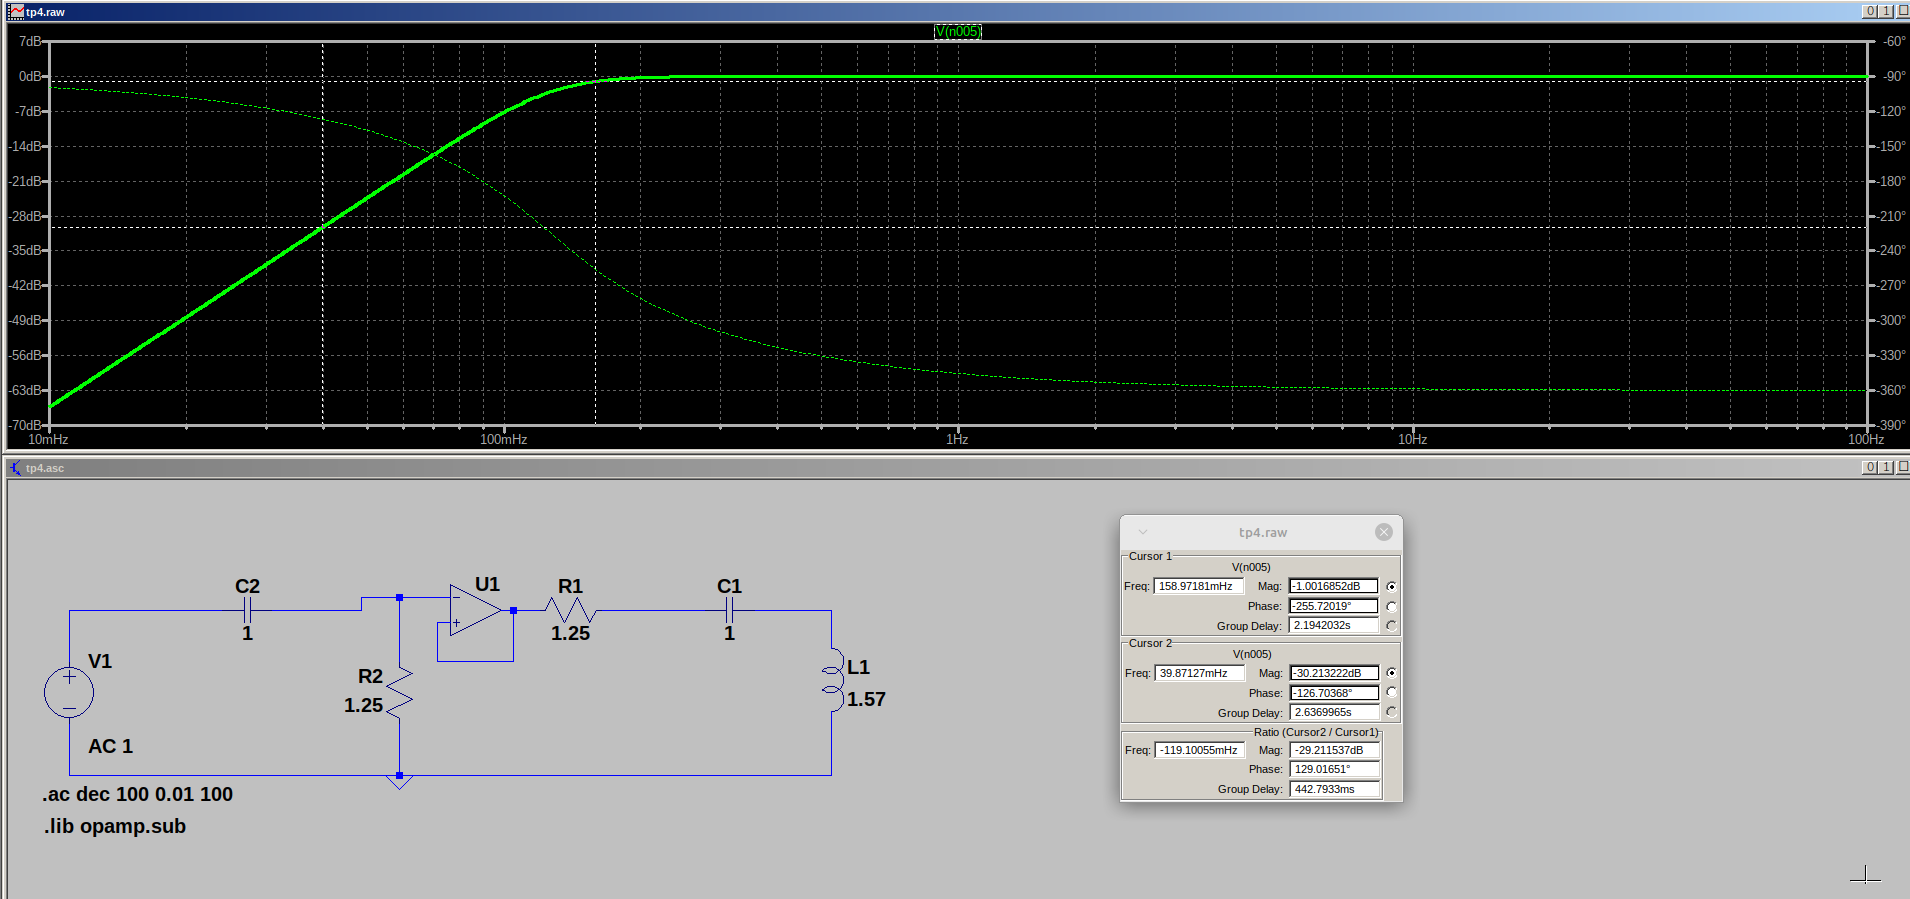

### Con GIC

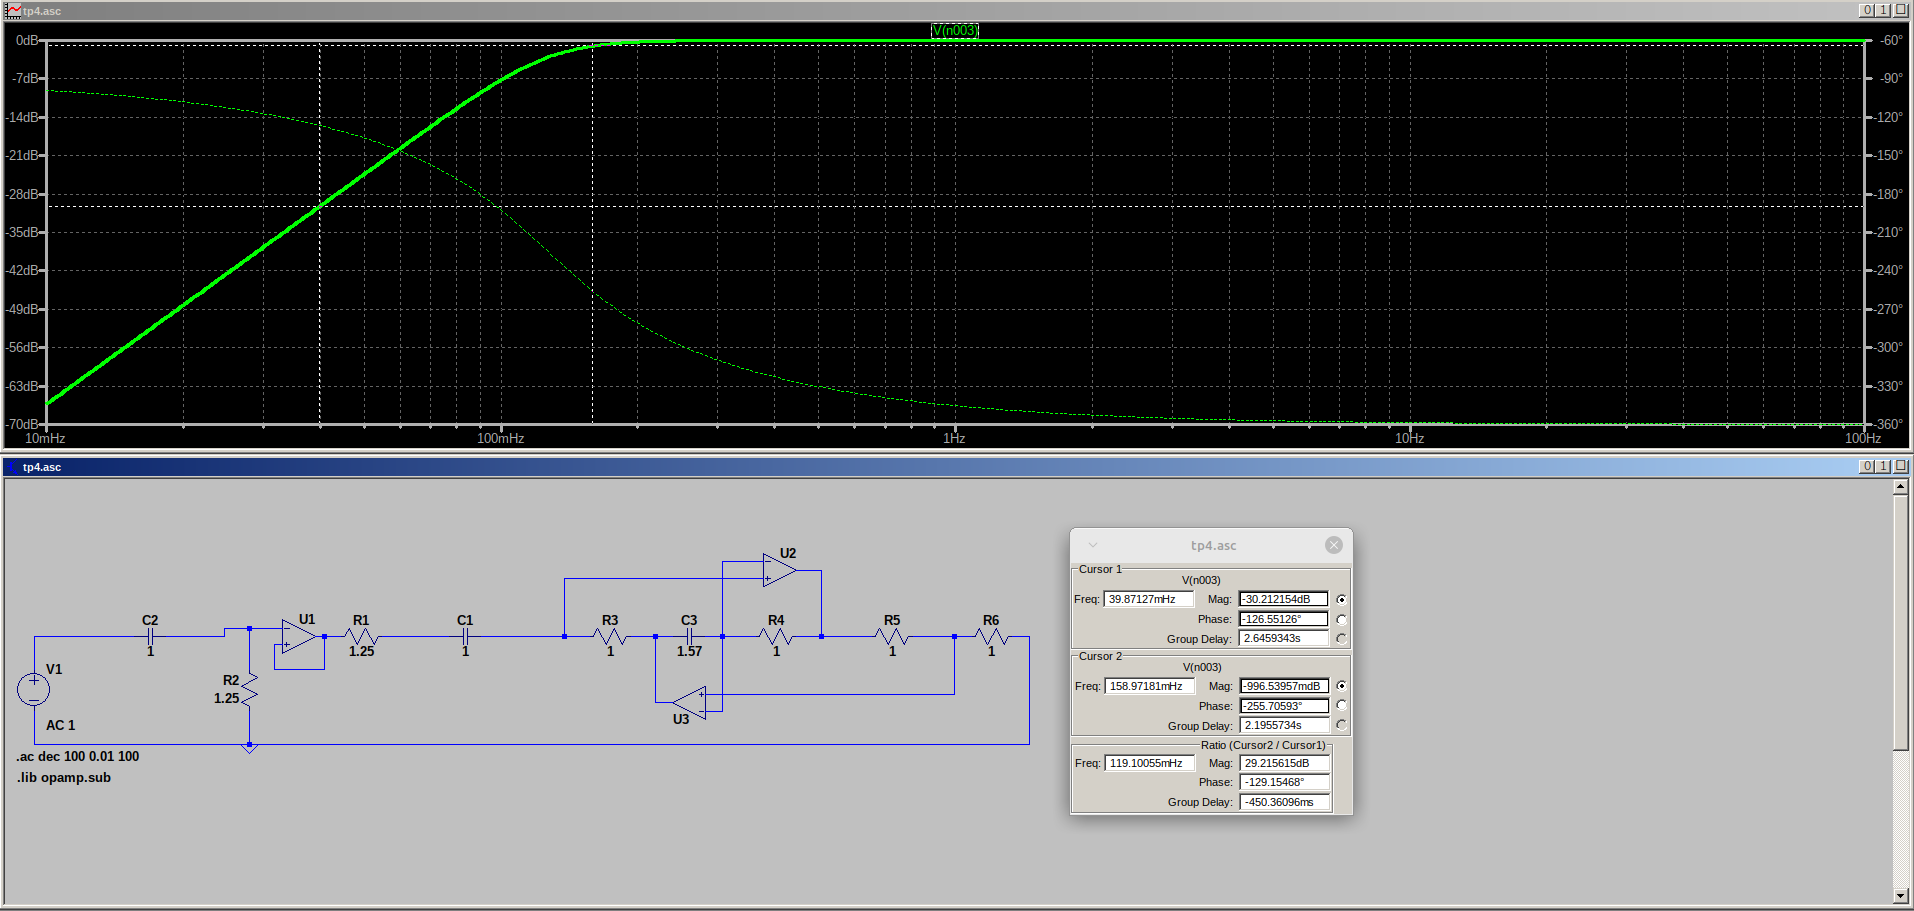

Se confirmaron las restricciones de plantilla para ambos casos

 ## *Simulación numérica*

In [2]:
#%% Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction     #de el scipy solo exporto la funcion transferfunction
from scipy import signal as sig  
import matplotlib.pyplot as plt               #le doy un nombre (plt) al matplotlib para usarlo más comodamente
import numpy as np                            #le doy un nombre (np) al numpy para usarlo más comodamente
import math as m

##### Librería de TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot   #libreria de la catedra. en este caso importo diag. pol. y ceros, retardo y bode

#Defino mi plantilla

alp_MAX=1       #dB
alp_min=30      #dB
    
fs = 10 * 10**3        #Hz
fp = 40 * 10**3        #Hz
     
wp= 2* m.pi *fp
ws= 2*m.pi*fs

In [1]:
#Para graficos

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

NameError: name 'plt' is not defined

In [4]:
#La normalización en mi pasa altos objetivo
wp_n_pa=1;             # wp/wp
ws_n_pa=ws/wp;

#Y la normalización en mi pasa bajos prototipo (con el que voy a trabajar)
wp_n_pb = 1/wp_n_pa;             
ws_n_pb = 1/ws_n_pa;

#Se calculan epsilon y n automatico 

eps = m.sqrt( 10**(alp_MAX/10) - 1 )
    
n = m.log((m.pow(10, alp_min * 0.1) - 1) / (eps**2))/(2*m.log(ws_n_pb)) 
n = m.ceil(n)

print("N=",n)
print("Epsilon=",eps)

N= 3
Epsilon= 0.5088471399095875


In [5]:
#Defino mis normas de butter para el prototipo pb y mi pasa altos objetivo
wb_pb = wp*eps**(-1/n)
wb_pa = wp*eps**(1/n)

#Obtengo los q (me falta agregarle una forma de automatizar cuantos q sacar en funcion de n)
qq=1/(2*m.cos(m.pi/n))

### *Pasa bajos prototipo* superpuesto con *pasa altos* (sin normalizar)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

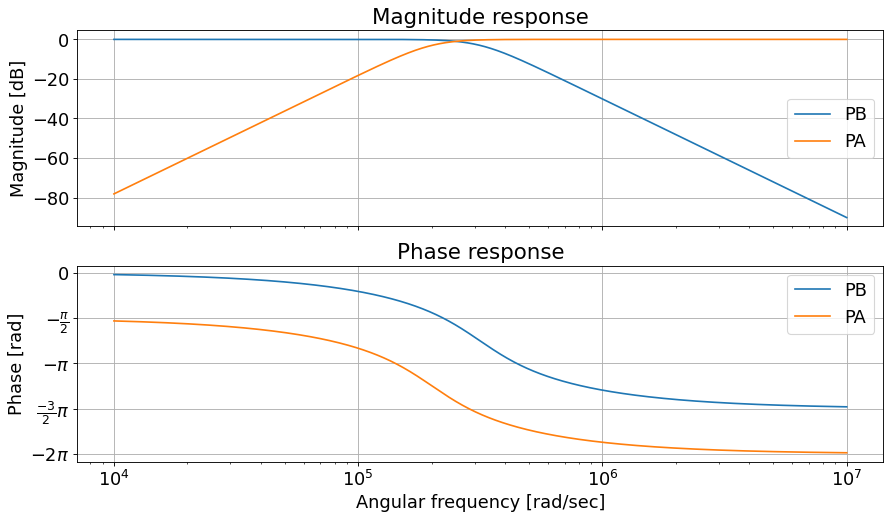

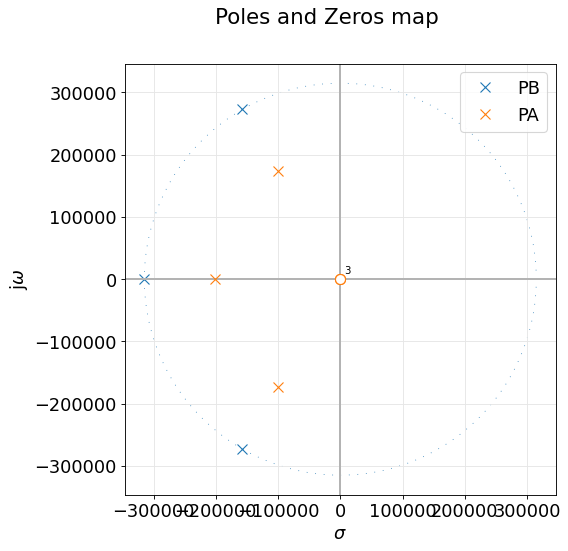

In [6]:
#Primero ploteo mi pasa bajos prototipo (SIN NORMALIZACION)

primero_num=[wb_pb**2]
primero_den=[1, wb_pb/qq , wb_pb**2 ]

segundo_num=[wb_pb]
segundo_den=[1 , wb_pb]

tf_completa = TransferFunction(np.polymul(primero_num, segundo_num),np.polymul(primero_den,segundo_den))

bodePlot(tf_completa, fig_id=1, filter_description = 'PB');
pzmap(tf_completa, fig_id=2, filter_description = 'PB')

#Luego ploteo en el mismo diagrama mi pasa altos   (SIN NORMALIZACION)

primero_num=[1, 0, 0]
primero_den=[1, wb_pa/qq , wb_pa**2 ]

segundo_num=[1, 0]
segundo_den=[1 , wb_pa]

tf_completa = TransferFunction(np.polymul(primero_num, segundo_num),np.polymul(primero_den,segundo_den))

bodePlot(tf_completa, fig_id=1, filter_description = 'PA');
pzmap(tf_completa, fig_id=2, filter_description = 'PA')


### *Pasa bajos prototipo* superpuesto con *pasa altos* (normalizado en wp)

(3, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

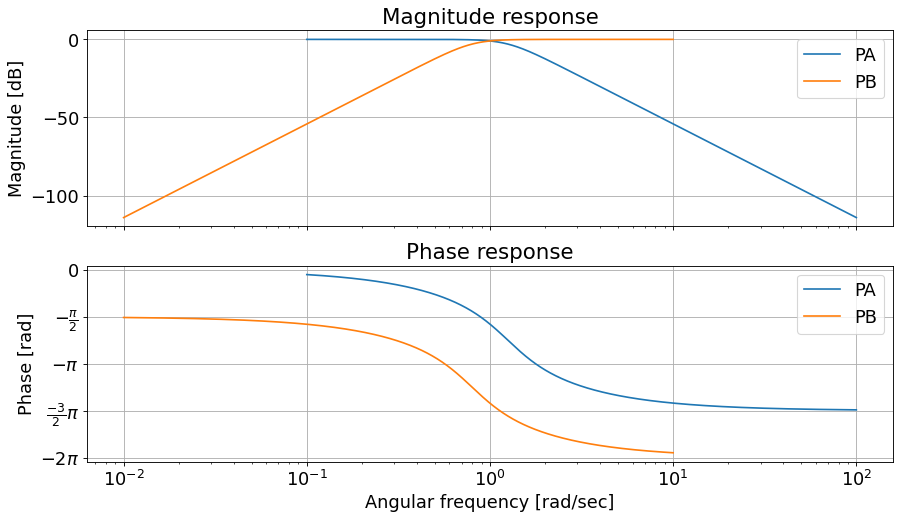

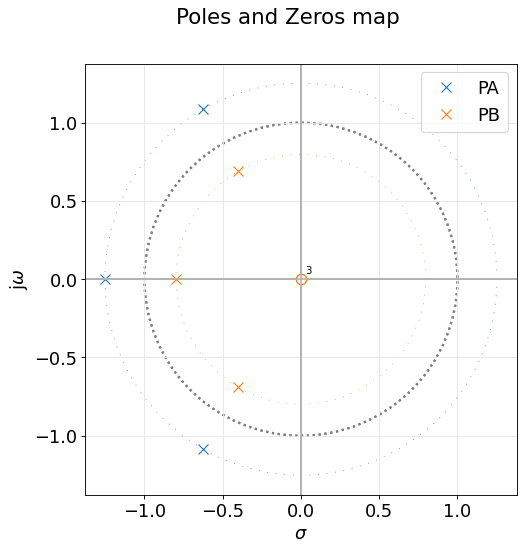

In [7]:
#Primero ploteo mi pasa bajos prototipo   (NORMALIZADO CON WP SOLAMENTE)

primero_num=[(eps**(-1/n))**2]
primero_den=[1, (eps**(-1/n))/qq , (eps**(-1/n))**2 ]

segundo_num=[(eps**(-1/n))]
segundo_den=[1 , (eps**(-1/n))]

tf_completa = TransferFunction(np.polymul(primero_num, segundo_num),np.polymul(primero_den,segundo_den))

bodePlot(tf_completa, fig_id=4, filter_description = 'PA');
pzmap(tf_completa, fig_id=3, filter_description = 'PA')

#Luego ploteo en el mismo diagrama mi pasa altos   (NORMALIZADO CON WP SOLAMENTE))

primero_num=[1, 0, 0]
primero_den=[1, (eps**(1/n))/qq , (eps**(1/n))**2 ]

segundo_num=[1, 0]
segundo_den=[1 , (eps**(1/n))]

tf_completa = TransferFunction(np.polymul(primero_num, segundo_num),np.polymul(primero_den,segundo_den))

bodePlot(tf_completa, fig_id=4, filter_description = 'PB');
pzmap(tf_completa, fig_id=3, filter_description = 'PB')